# **Análisis Exploratorio de Datos**

In [49]:
import pandas as pd
df = pd.read_csv("C://Users//corec//OneDrive//Documentos//Arc. Carlos//BUAP//Intro a la Ciencia de Datos//Base EV Limpia.csv")
df

,ID_del_Vehículo,Marca,Modelo,Año,Región,Tipo_de_Vehículo,Capacidad_de_Batería_kWh,Salud_de_Batería_%,Autonomía_km,Potencia_de_Carga_kW,...,Velocidad_Máxima_kmh,Aceleración_0_100_kmh_seg,Temperatura_°C,Tipo_de_Uso,CO2_Ahorrado_tons,Costo_de_Mantenimiento_USD_por_año,Costo_de_Seguro_USD_por_año,Costo_de_Electricidad_en_USD_por_kWh,Costo_Mensual_de_Carga_USD,Valor_de_Reventa_USD
0,1.0,Nissan,Leaf,2021.0,Asia,SUV,101.7,75.5,565.0,Desconocido,...,233.0,8.1,-9.0,Personal,14.13,969.0,843.0,0.3,375.55,26483.0
1,2.0,Nissan,Leaf,2020.0,Australia,Sedán,30.1,99.8,157.0,157.2,...,221.0,9.83,1.6,Personal,19.41,1157.0,1186.0,0.25,532.02,11287.0
2,3.0,Hyundai,Kona Electric,2021.0,Norteamérica,SUV,118.5,Desconocido,677.0,173.6,...,138.0,3.6,1.5,Flota,29.39,291.0,1890.0,0.26,1291.68,34023.0
3,4.0,Audi,Q4 e-tron,2022.0,Europa,Hatchback,33.1,97.3,149.0,169.3,...,192.0,8.97,12.5,Flota,6.96,401.0,2481.0,Desconocido,234.44,14398.0
4,5.0,Tesla,Model 3,2022.0,Australia,Desconocido,81.3,85.6,481.0,212.8,...,189.0,7.03,-3.0,Comercial,2.06,214.0,2336.0,0.1,32.61,23033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526,857.0,Desconocido,Leaf,2020.0,Europa,Camioneta,107.9,87.0,585.0,Desconocido,...,246.0,6.69,5.8,Personal,28.68,1372.0,2220.0,0.17,673.44,31297.0
3527,1933.0,Nissan,Ariya,2023.0,Asia,Camioneta,67.2,87.5,284.0,157.9,...,208.0,3.53,4.0,Comercial,5.51,720.0,2022.0,0.34,216.17,22600.0
3528,2265.0,Ford,Mustang Mach-E,Desconocido,Australia,Camioneta,90.2,94.3,502.0,Desconocido,...,133.0,9.12,-0.7,Desconocido,0.98,1999.0,1102.0,0.31,40.46,29809.0
3529,2062.0,Hyundai,Kona Electric,2022.0,Europa,Sedán,Desconocido,91.2,265.0,176.1,...,175.0,7.77,29.1,Flota,11.96,1312.0,2328.0,0.1,109.53,22883.0


In [ ]:
# Transformar columnas numéricas 
cols_numericas = [
    "Año",
    "Capacidad_de_Batería_kWh",
    "Salud_de_Batería_%",
    "Autonomía_km",
    "Potencia_de_Carga_kW",
    "Tiempo_de_Carga_hr",
    "Ciclos_de_Carga",
    "Consumo_de_Energía_por_100km_recorridos",
    "Kilometraje_km",
    "Velocidad_Promedio_kmh",
    "Velocidad_Máxima_kmh",
    "Aceleración_0_100_kmh_seg",
    "Temperatura_°C",
    "CO2_Ahorrado_tons",
    "Costo_de_Mantenimiento_USD_por_año",
    "Costo_de_Seguro_USD_por_año",
    "Costo_de_Electricidad_en_USD_por_kWh",
    "Costo_Mensual_de_Carga_USD",
    "Valor_de_Reventa_USD"
]

for c in cols_numericas:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(",","").str.replace("$","").str.replace("%",""), errors="coerce") # Convertir a numérico, manejar errores

In [51]:
df[cols_numericas] = df[cols_numericas].fillna(df[cols_numericas].median())

### **1. Descripción general de los datos**

* *Visión general*

In [52]:
df.shape

(3531, 25)


* *Tipos de variables*

In [53]:
df.dtypes

ID_del_Vehículo                             object
Marca                                       object
Modelo                                      object
Año                                        float64
Región                                      object
Tipo_de_Vehículo                            object
Capacidad_de_Batería_kWh                   float64
Salud_de_Batería_%                         float64
Autonomía_km                               float64
Potencia_de_Carga_kW                       float64
Tiempo_de_Carga_hr                         float64
Ciclos_de_Carga                            float64
Consumo_de_Energía_por_100km_recorridos    float64
Kilometraje_km                             float64
Velocidad_Promedio_kmh                     float64
Velocidad_Máxima_kmh                       float64
Aceleración_0_100_kmh_seg                  float64
Temperatura_°C                             float64
Tipo_de_Uso                                 object
CO2_Ahorrado_tons              

* *Resumen estadístico*

1. Numéricas

In [54]:
df.describe().T.round(3) # "T" para transponer la tabla de forma ordenada y "Round 3" para redondear a 3 decimales

,count,mean,std,min,25%,50%,75%,max
Año,3531.0,2019.541,2.759,2015.00,2017.000,2020.000,2022.000,2024.00
Capacidad_de_Batería_kWh,3531.0,74.648,24.989,30.00,54.000,74.200,95.100,120.00
Salud_de_Batería_%,3531.0,84.989,8.406,70.00,78.000,85.200,91.900,100.00
Autonomía_km,3531.0,374.235,134.416,121.00,265.000,371.000,472.000,713.00
Potencia_de_Carga_kW,3531.0,129.080,66.457,11.10,74.350,127.000,184.000,250.00
Tiempo_de_Carga_hr,3531.0,1.177,1.389,0.14,0.470,0.720,1.225,12.14
Ciclos_de_Carga,3531.0,1113.061,493.998,200.00,716.500,1125.000,1510.500,1997.00
Consumo_de_Energía_por_100km_recorridos,3531.0,18.583,3.679,12.00,15.490,18.700,21.630,24.99
Kilometraje_km,3531.0,125719.415,69569.819,5046.00,67451.000,126249.500,183659.500,249959.00
Velocidad_Promedio_kmh,3531.0,65.942,19.672,30.00,49.200,66.200,82.700,100.00


2. Categóricas

In [55]:
Cat=["ID_del_Vehículo",
     "Marca",
     "Modelo",
     "Región",
     "Tipo_de_Vehículo",
     "Tipo_de_Uso"
     ]
for c in Cat:
    print(df[c].value_counts().T.round(3))
    print("-----")

ID_del_Vehículo
Desconocido    143
2869.0           4
365.0            4
960.0            4
2058.0           3
              ... 
10.0             1
8.0              1
7.0              1
6.0              1
5.0              1
Name: count, Length: 2903, dtype: int64
-----
Marca
Ford           364
Hyundai        353
Chevrolet      349
BMW            344
Volkswagen     336
Nissan         326
Mercedes       324
Audi           319
Kia            310
Tesla          295
Desconocido    211
Name: count, dtype: int64
-----
Modelo
Bolt EUV           191
F-150 Lightning    186
Kona Electric      185
Mustang Mach-E     182
ID.4               174
Niro EV            173
Leaf               172
ID.3               172
EQC                171
e-tron             169
Ioniq 5            168
Bolt EV            165
EQS                162
Ariya              162
Q4 e-tron          155
Desconocido        143
EV6                141
i3                 130
iX                 114
i4                 108
Model X        

### **2. Visualización y distribución de variables individuales**

* Variables Numéricas

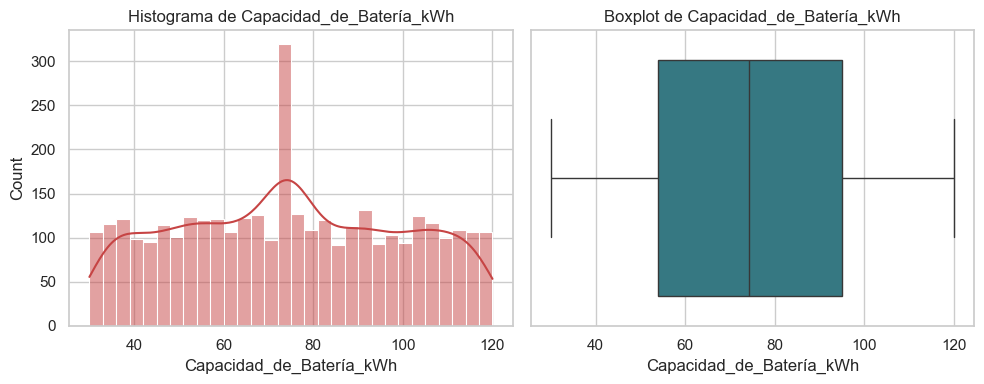

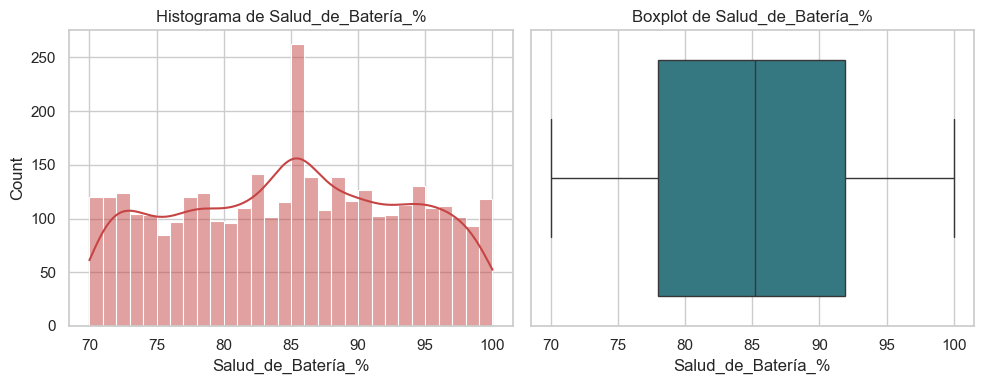

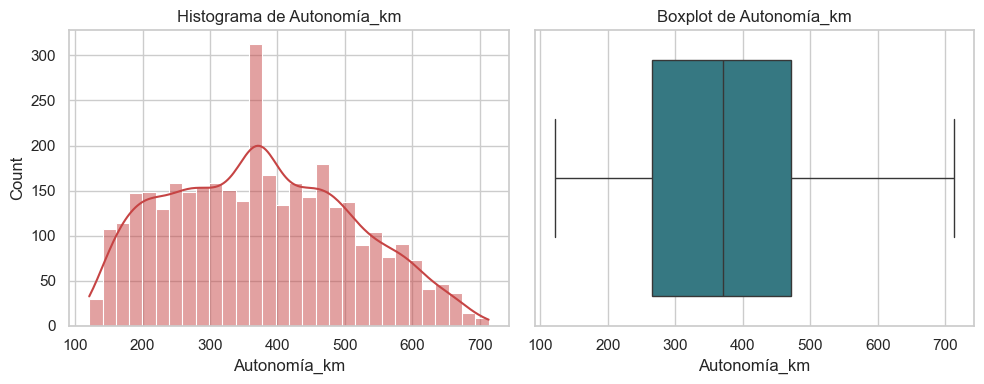

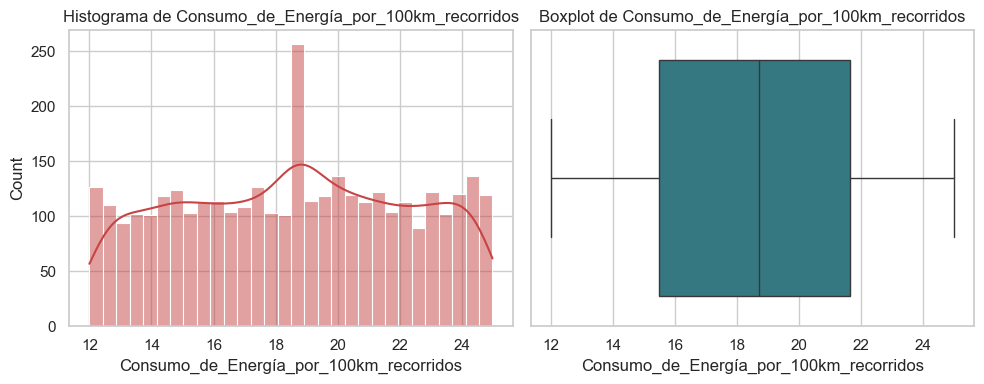

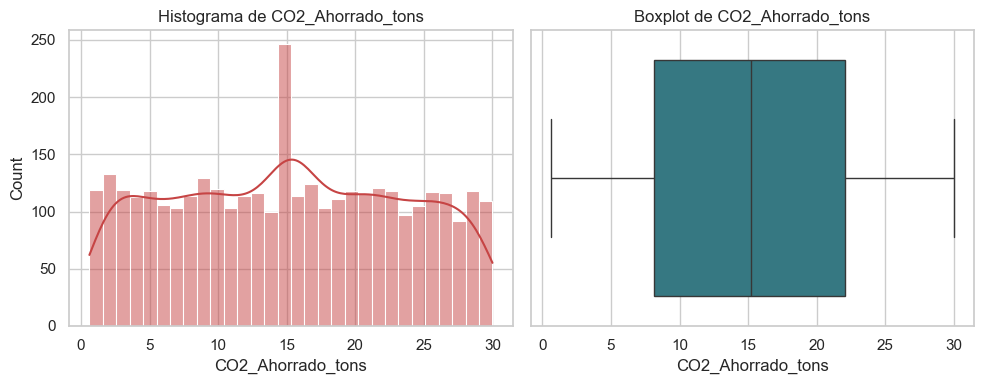

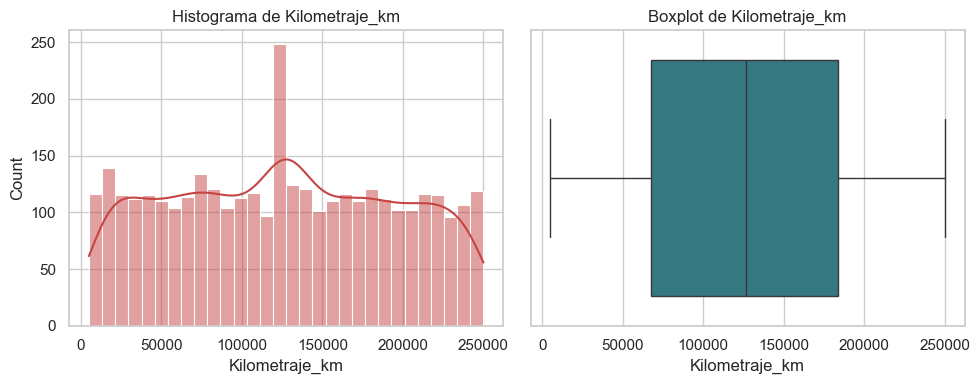

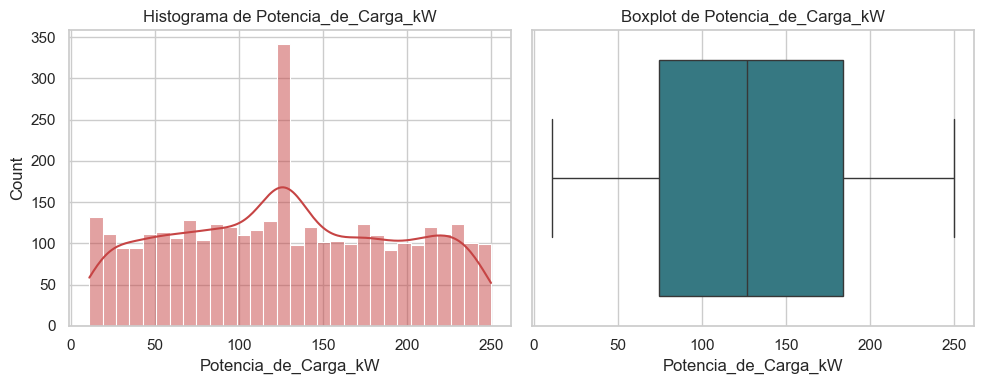

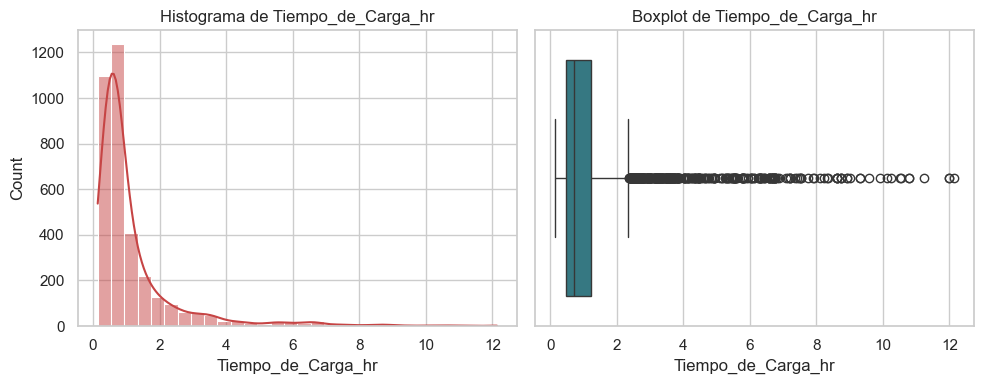

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

variables=["Capacidad_de_Batería_kWh", "Salud_de_Batería_%",
    "Autonomía_km", "Consumo_de_Energía_por_100km_recorridos", "CO2_Ahorrado_tons",
    "Kilometraje_km", "Potencia_de_Carga_kW", "Tiempo_de_Carga_hr"]

for var in variables:
    plt.figure(figsize=(10,4))
    #Para los histogramas
    plt.subplot(1,2,1)
    sns.histplot(df[var], kde=True, color="#C64444", bins=30)
    plt.title(f"Histograma de {var}")
    #Para los boxplots
    plt.subplot(1,2,2)
    sns.boxplot(x=df[var], color="#29818F")
    plt.title(f"Boxplot de {var}")

    plt.tight_layout()
    plt.show()

* Categóricas

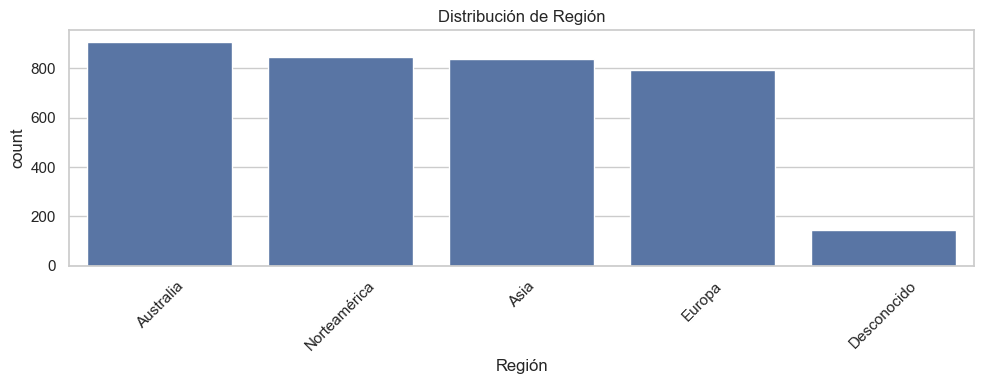

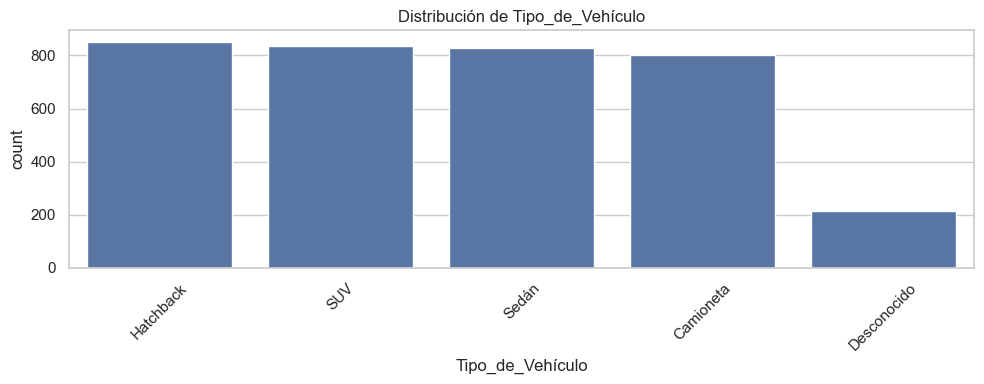

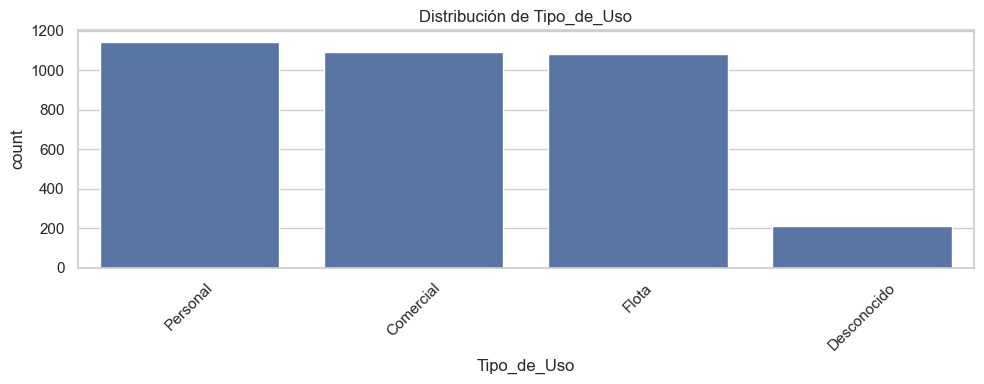

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

categoricas=["Región", "Tipo_de_Vehículo", "Tipo_de_Uso"]

for cat in categoricas:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[cat], order=df[cat].value_counts().index)
    plt.title(f"Distribución de {cat}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### **3. Correlación entre Variables**

* Matriz de Correlación

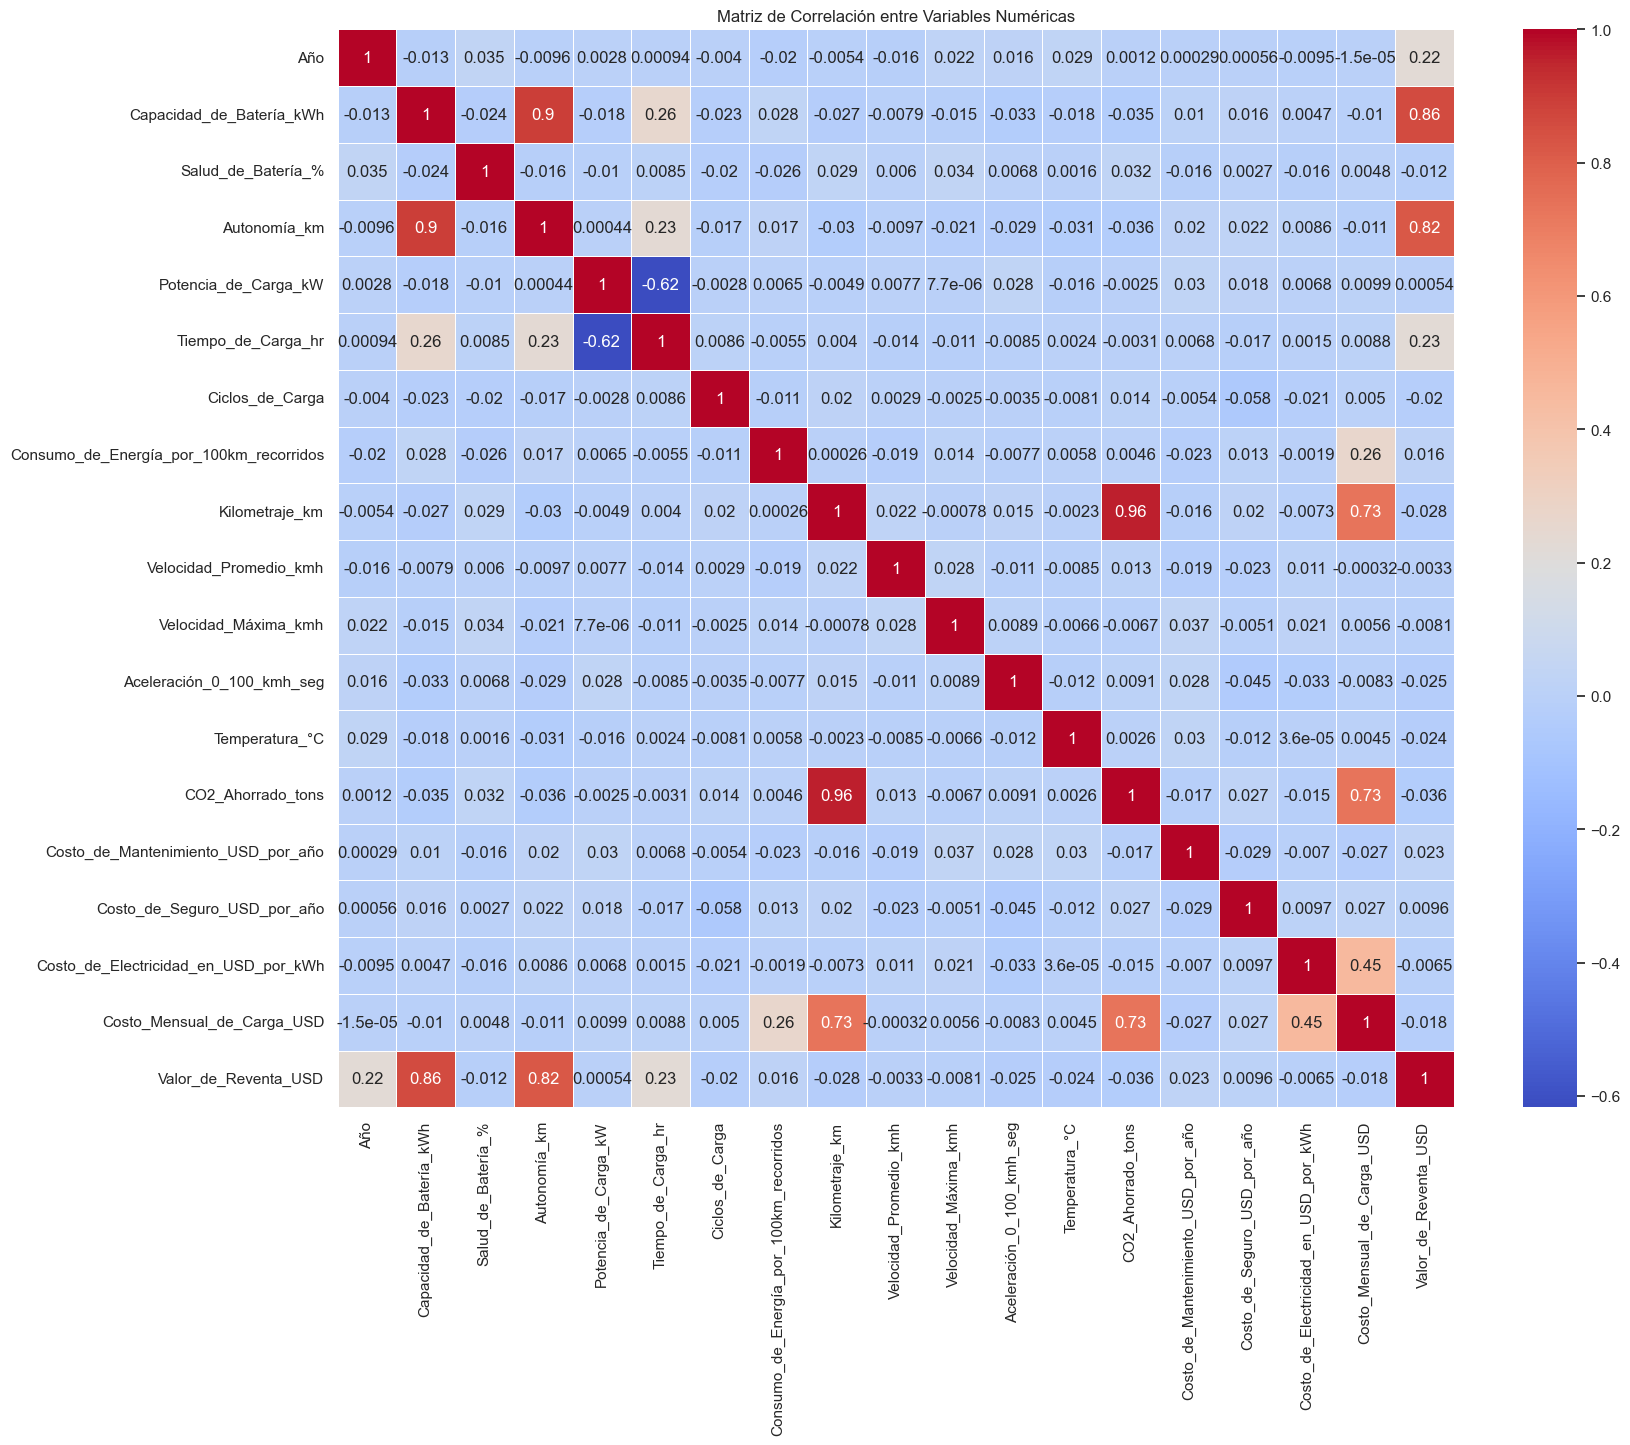

In [58]:
# Seleccionar solo variables numéricas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,14))
sns.heatmap(df_numericas.corr(), annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

* Parejas de variables (scatter plots)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

1. Capacidad de batería vs Autonomía *(Correlación: 0.86)*

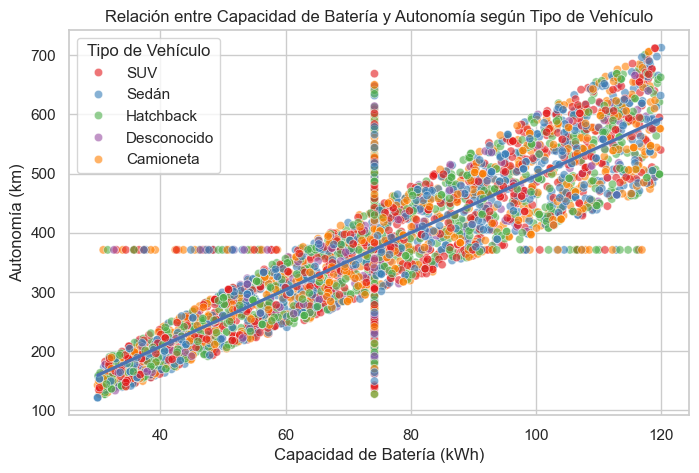

In [60]:
#Distribución entre Capacidad de Batería y Autonomía con diferentes colores
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Capacidad_de_Batería_kWh", y="Autonomía_km", hue="Tipo_de_Vehículo",
                palette="Set1", alpha=0.6)
sns.regplot(data=df, x='Capacidad_de_Batería_kWh', y='Autonomía_km', scatter=False)
plt.title("Relación entre Capacidad de Batería y Autonomía según Tipo de Vehículo")
plt.xlabel("Capacidad de Batería (kWh)")
plt.ylabel("Autonomía (km)")
plt.legend(title="Tipo de Vehículo")
plt.show()

2. Kilometraje vs CO2 Ahorrado *(Correlación: 0.96)*

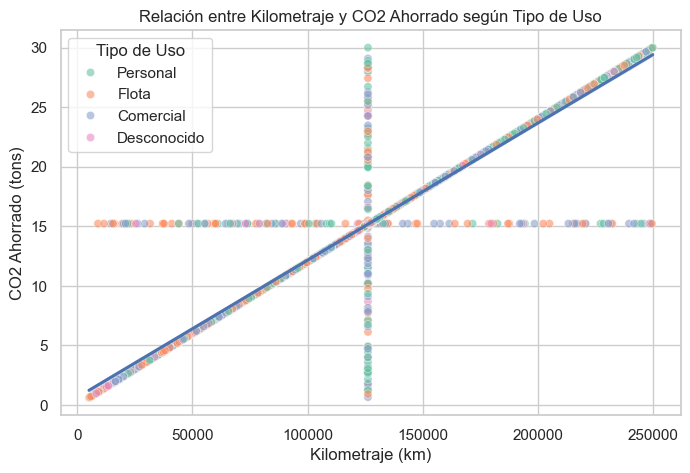

In [61]:
#Distribución entre CO2 ahorrado y kilometraje con diferentes colores
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Kilometraje_km", y="CO2_Ahorrado_tons", hue="Tipo_de_Uso", palette="Set2", alpha=0.6)
sns.regplot(data=df, x='Kilometraje_km', y='CO2_Ahorrado_tons', scatter=False)
plt.title("Relación entre Kilometraje y CO2 Ahorrado según Tipo de Uso")
plt.xlabel("Kilometraje (km)")
plt.ylabel("CO2 Ahorrado (tons)")
plt.legend(title="Tipo de Uso")
plt.show()

3. Consumo Energético vs Autonomía *(Correlación: 0.017)*

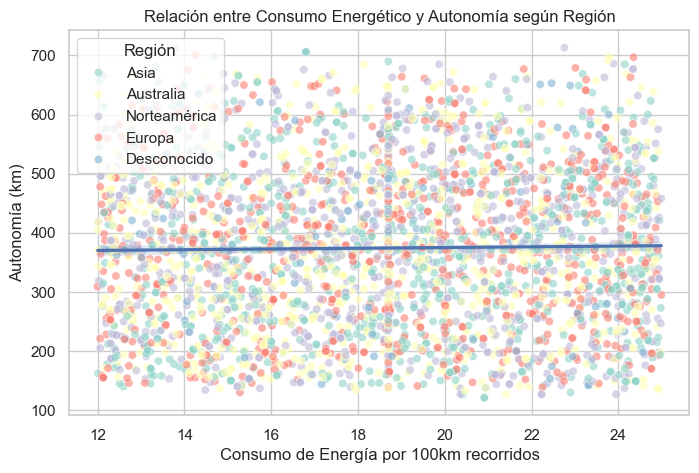

In [62]:
#Distribución entre Consumo Energético y Autonomía con diferentes colores
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Consumo_de_Energía_por_100km_recorridos", y="Autonomía_km", hue="Región",
                palette="Set3", alpha=0.6)
sns.regplot(data=df, x='Consumo_de_Energía_por_100km_recorridos', y='Autonomía_km', scatter=False)
plt.title("Relación entre Consumo Energético y Autonomía según Región")
plt.xlabel("Consumo de Energía por 100km recorridos")
plt.ylabel("Autonomía (km)")
plt.legend(title="Región")
plt.show()

4. Potencia de carga vs Tiempo de carga *(Correlación: -0.62)*

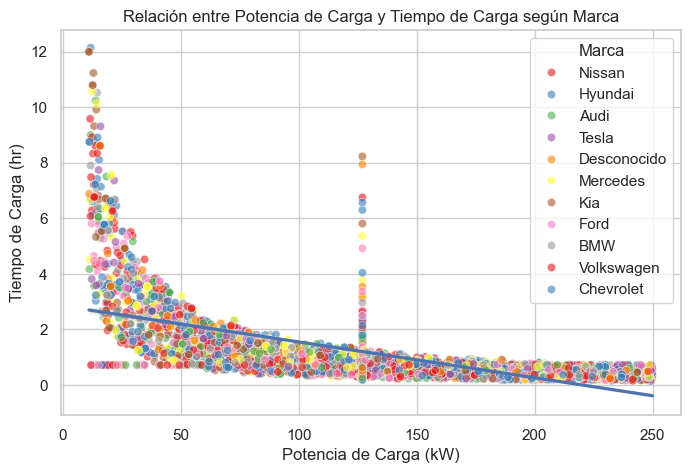

In [63]:
#Distribución entre Potencia de Carga y Tiempo de Carga con diferentes colores
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Potencia_de_Carga_kW", y="Tiempo_de_Carga_hr", hue="Marca", palette="Set1", alpha=0.6)
sns.regplot(data=df, x='Potencia_de_Carga_kW', y='Tiempo_de_Carga_hr', scatter=False)
plt.title("Relación entre Potencia de Carga y Tiempo de Carga según Marca")
plt.xlabel("Potencia de Carga (kW)")
plt.ylabel("Tiempo de Carga (hr)")
plt.legend(title="Marca")
plt.show()

5. Kilometraje vs Salud de batería *(Correlación: -0.29)*

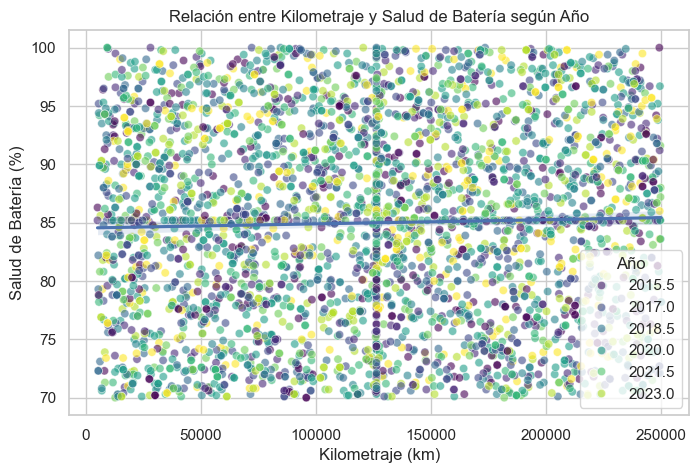

In [64]:
#Distribución entre Kilometraje y Salud de Batería con diferentes colores
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Kilometraje_km", y="Salud_de_Batería_%", hue="Año", palette="viridis", alpha=0.6)
sns.regplot(data=df, x='Kilometraje_km', y='Salud_de_Batería_%', scatter=False)
plt.title("Relación entre Kilometraje y Salud de Batería según Año")
plt.xlabel("Kilometraje (km)")
plt.ylabel("Salud de Batería (%)")
plt.legend(title="Año")
plt.show()

6. Temperatura vs Autonomía *(Correlación -0.24)*

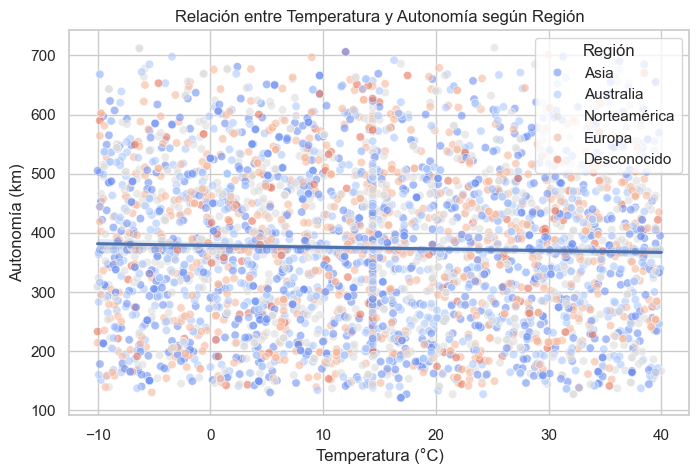

In [65]:
#Distribución entre Temperatura y Autonomía con diferentes colores
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Temperatura_°C", y="Autonomía_km", hue="Región", palette="coolwarm", alpha=0.6)
sns.regplot(data=df, x='Temperatura_°C', y='Autonomía_km', scatter=False)
plt.title("Relación entre Temperatura y Autonomía según Región")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Autonomía (km)")
plt.legend(title="Región")
plt.show()

7. Autonomía vs Valor de reventa *(Correlación: 0.82)*

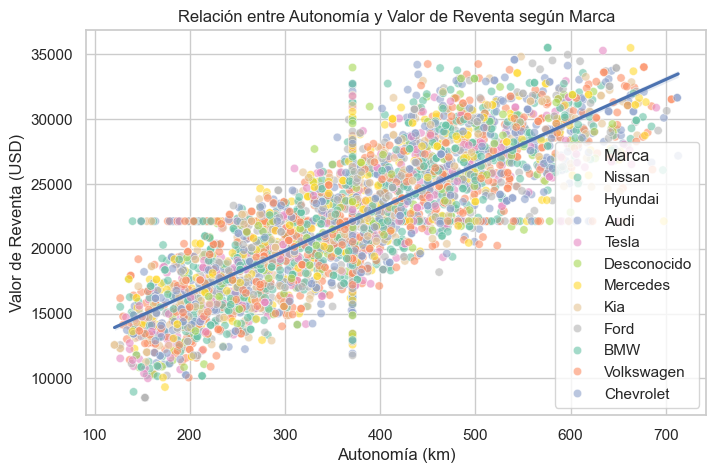

In [66]:
#Distribución entre Autonomía y Valor de Reventa con diferentes colores
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Autonomía_km", y="Valor_de_Reventa_USD", hue="Marca", palette="Set2", alpha=0.6)
sns.regplot(data=df, x='Autonomía_km', y='Valor_de_Reventa_USD', scatter=False)
plt.title("Relación entre Autonomía y Valor de Reventa según Marca")
plt.xlabel("Autonomía (km)")
plt.ylabel("Valor de Reventa (USD)")
plt.legend(title="Marca")
plt.show()

8. Kilometraje vs Costo mensual de carga *(Correlación: 0.73)*

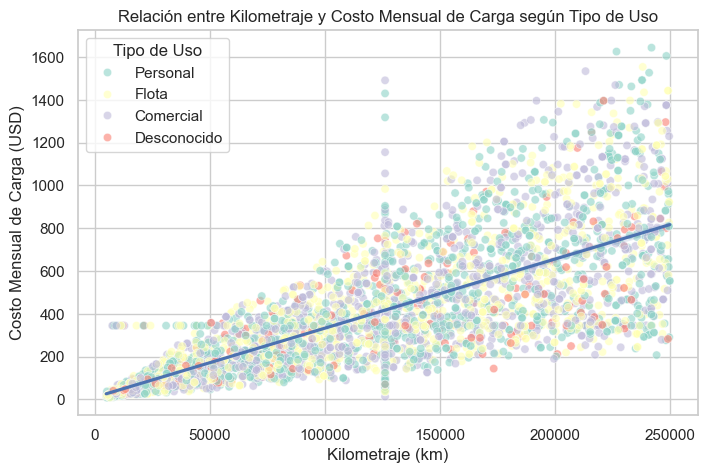

In [67]:
#Distribución entre Kilometraje y Costo mensual de carga con diferentes colores
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Kilometraje_km", y="Costo_Mensual_de_Carga_USD", hue="Tipo_de_Uso",
                palette="Set3", alpha=0.6)
sns.regplot(data=df, x='Kilometraje_km', y='Costo_Mensual_de_Carga_USD', scatter=False)
plt.title("Relación entre Kilometraje y Costo Mensual de Carga según Tipo de Uso")
plt.xlabel("Kilometraje (km)")
plt.ylabel("Costo Mensual de Carga (USD)")
plt.legend(title="Tipo de Uso")
plt.show()

### **4. Análisis de Valores Atípicos (Outliers)**

In [68]:
def detectar_outliers_IQR(serie):
    Q1=serie.quantile(0.25)
    Q3=serie.quantile(0.75)
    IQR=Q3-Q1

    limite_inferior=Q1-1.5*IQR
    limite_superior=Q3+1.5*IQR

    outliers=serie[(serie<limite_inferior) | (serie>limite_superior)]
    return outliers, limite_inferior, limite_superior

variables_numericas=df.select_dtypes(include=["float64", "int64"]).columns

for col in variables_numericas:
    if col=="ID_del_Vehículo":
        continue #No analizar esta columna porque es sólo un identificador
    outliers, li, ls = detectar_outliers_IQR(df[col])
    print(f"Variables: {col}")
    print(f"Número de outliers detectados: {len(outliers)}")
    print(f"Limite Inferior: {li:.2f}")
    print(f"Limite Superior: {ls:.2f}")
    print("-----")

Variables: Año
Número de outliers detectados: 0
Limite Inferior: 2009.50
Limite Superior: 2029.50
-----
Variables: Capacidad_de_Batería_kWh
Número de outliers detectados: 0
Limite Inferior: -7.65
Limite Superior: 156.75
-----
Variables: Salud_de_Batería_%
Número de outliers detectados: 0
Limite Inferior: 57.15
Limite Superior: 112.75
-----
Variables: Autonomía_km
Número de outliers detectados: 0
Limite Inferior: -45.50
Limite Superior: 782.50
-----
Variables: Potencia_de_Carga_kW
Número de outliers detectados: 0
Limite Inferior: -90.13
Limite Superior: 348.48
-----
Variables: Tiempo_de_Carga_hr
Número de outliers detectados: 378
Limite Inferior: -0.66
Limite Superior: 2.36
-----
Variables: Ciclos_de_Carga
Número de outliers detectados: 0
Limite Inferior: -474.50
Limite Superior: 2701.50
-----
Variables: Consumo_de_Energía_por_100km_recorridos
Número de outliers detectados: 0
Limite Inferior: 6.28
Limite Superior: 30.84
-----
Variables: Kilometraje_km
Número de outliers detectados: 0
Li

### **5. Análisis de Valores Faltantes *(Missing Values)***

In [69]:
df.isnull().sum()

ID_del_Vehículo                            0
Marca                                      0
Modelo                                     0
Año                                        0
Región                                     0
Tipo_de_Vehículo                           0
Capacidad_de_Batería_kWh                   0
Salud_de_Batería_%                         0
Autonomía_km                               0
Potencia_de_Carga_kW                       0
Tiempo_de_Carga_hr                         0
Ciclos_de_Carga                            0
Consumo_de_Energía_por_100km_recorridos    0
Kilometraje_km                             0
Velocidad_Promedio_kmh                     0
Velocidad_Máxima_kmh                       0
Aceleración_0_100_kmh_seg                  0
Temperatura_°C                             0
Tipo_de_Uso                                0
CO2_Ahorrado_tons                          0
Costo_de_Mantenimiento_USD_por_año         0
Costo_de_Seguro_USD_por_año                0
Costo_de_E

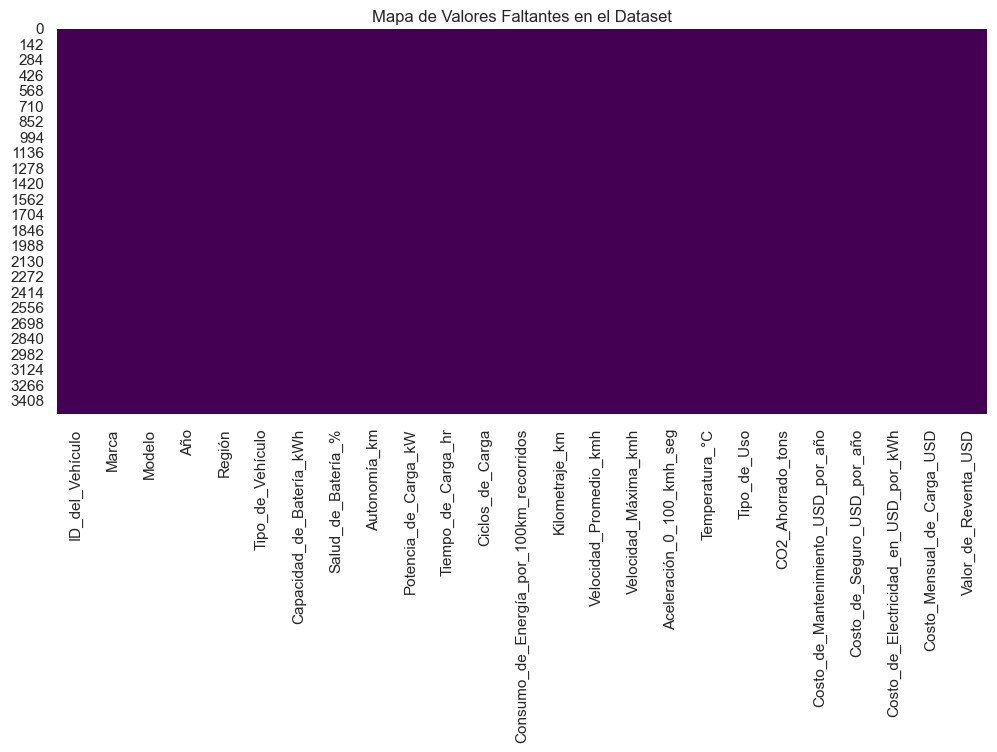

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Faltantes en el Dataset")
plt.show()

### **6. Relación entre Variables Categóricas y Numéricas**

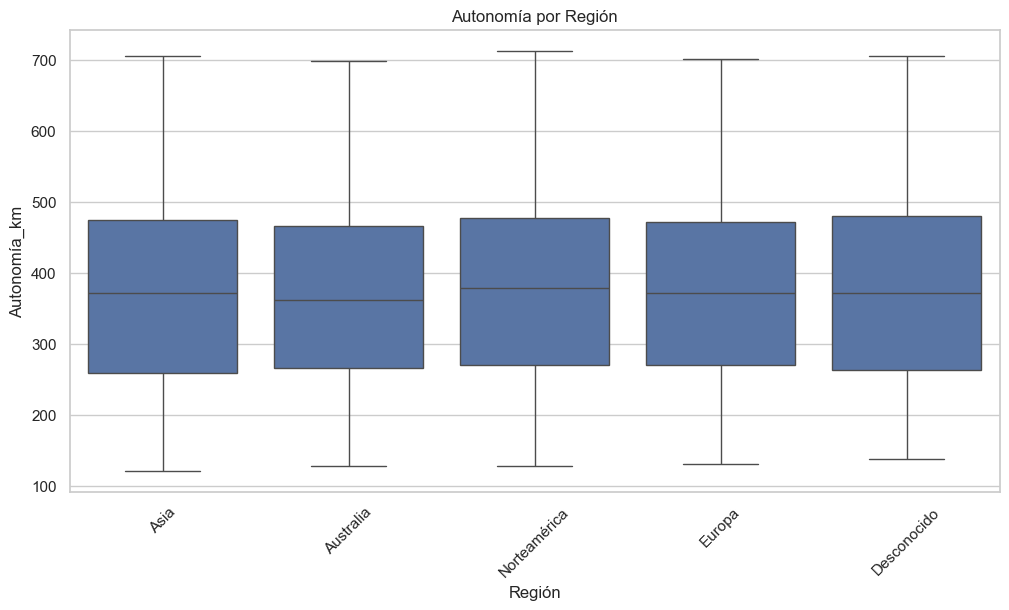

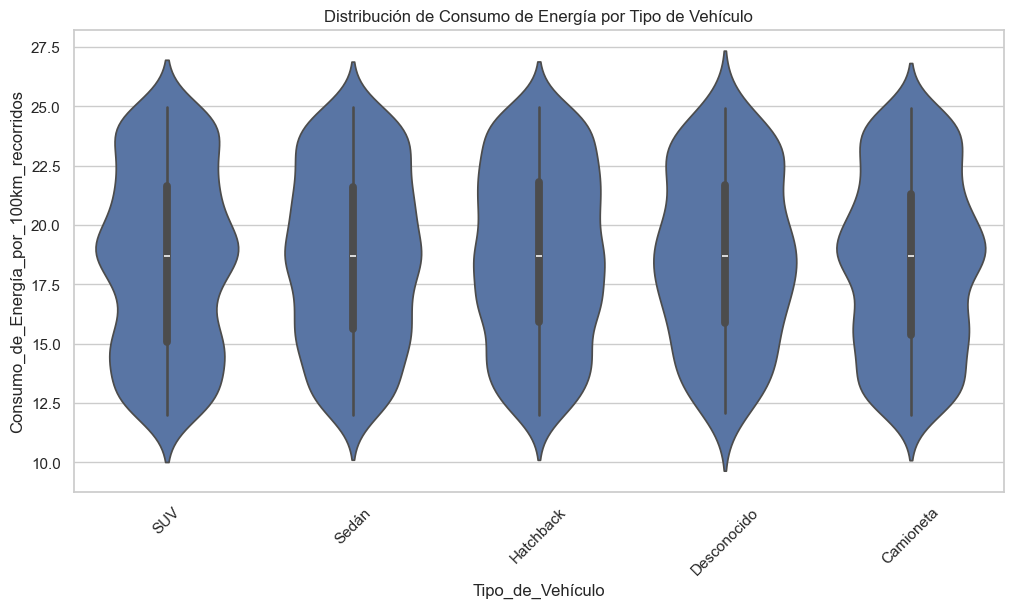

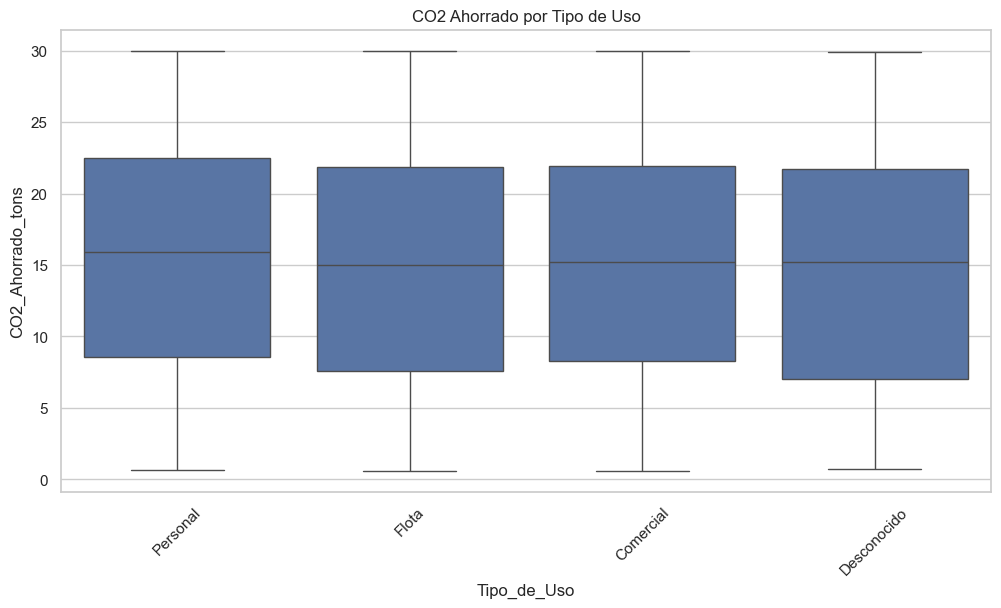

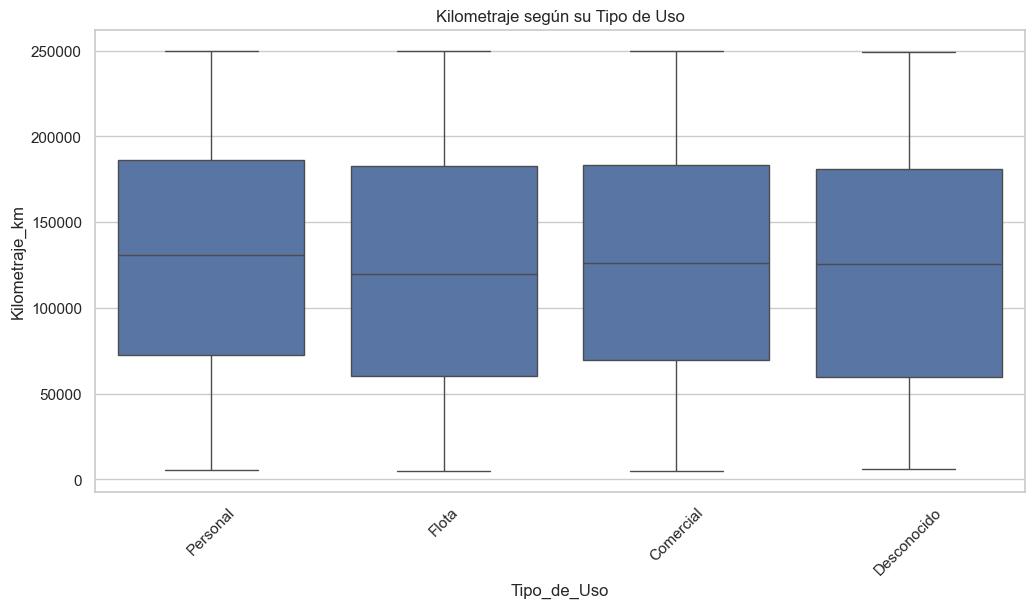

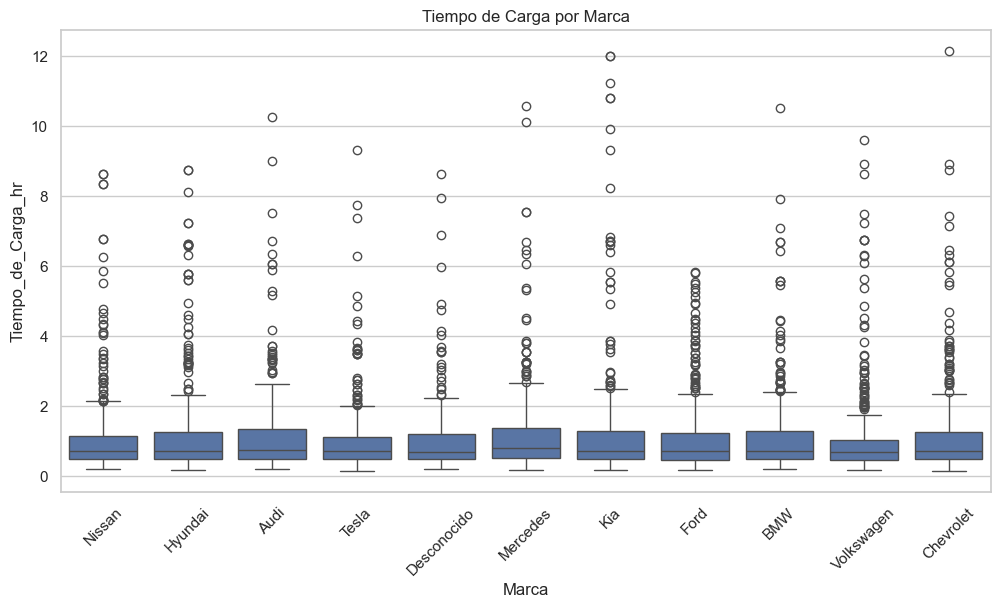

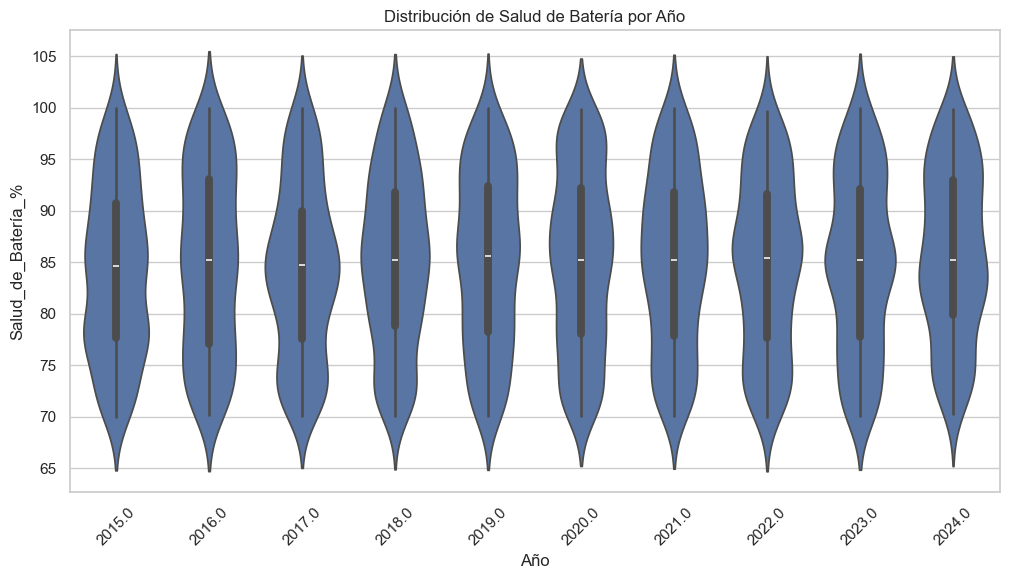

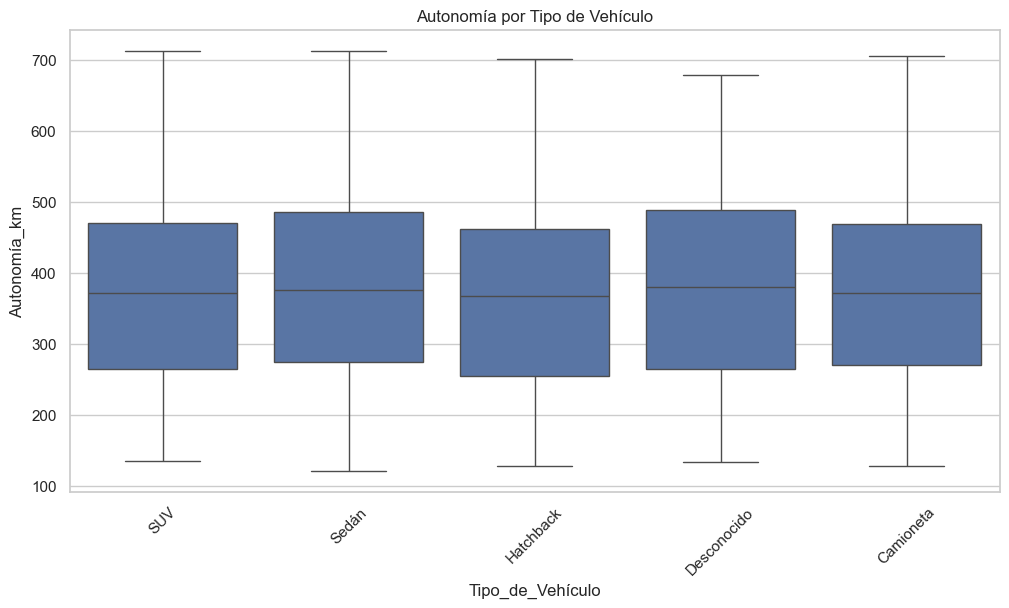

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

#1. Autonomía vs Región (Box Plot)
plt.figure(figsize=(12,6))
sns.boxplot(x="Región", y="Autonomía_km", data=df)
plt.title("Autonomía por Región")
plt.xticks(rotation=45)
plt.show()

#2. Consumo de Energía vs Tipo de Vehículo (Violin Plot)
plt.figure(figsize=(12,6))
sns.violinplot(x="Tipo_de_Vehículo", y="Consumo_de_Energía_por_100km_recorridos", data=df)
plt.title("Distribución de Consumo de Energía por Tipo de Vehículo")
plt.xticks(rotation=45)
plt.show()

#3. CO2 Ahorrado vs Tipo de Uso (Box Plot)
plt.figure(figsize=(12,6))
sns.boxplot(x="Tipo_de_Uso", y="CO2_Ahorrado_tons", data=df)
plt.title("CO2 Ahorrado por Tipo de Uso")
plt.xticks(rotation=45)
plt.show()

#4. Kilometraje vs Tipo de Uso (Box Plot)
plt.figure(figsize=(12,6))
sns.boxplot(x="Tipo_de_Uso", y="Kilometraje_km", data=df)
plt.title("Kilometraje según su Tipo de Uso")
plt.xticks(rotation=45)
plt.show()

#5. Tiempo de Carga vs Marca (Box Plot)
plt.figure(figsize=(12,6))
sns.boxplot(x="Marca", y="Tiempo_de_Carga_hr", data=df)
plt.title("Tiempo de Carga por Marca")
plt.xticks(rotation=45)
plt.show()

#6. Salud de Batería vs Año (Violin Plot)
plt.figure(figsize=(12,6))
sns.violinplot(x="Año", y="Salud_de_Batería_%", data=df)
plt.title("Distribución de Salud de Batería por Año")
plt.xticks(rotation=45)
plt.show()

#7. Autonomía vs Tipo de Vehículo (Box Plot)
plt.figure(figsize=(12,6))
sns.boxplot(x="Tipo_de_Vehículo", y="Autonomía_km", data=df)
plt.title("Autonomía por Tipo de Vehículo")
plt.xticks(rotation=45)
plt.show()

# **1er Modelo de Machine Learning**
### ***Para Autonomía (Regresión Lineal)***

### **3. Implementación y Entrenamiento**
*Definir X y y (antes del train_test_split)*

primero elegimos las variables que sí van al modelo

In [72]:
import pandas as pd
#variable objetivo = "Autonomía_km"
y=df["Autonomía_km"]
#variables numéricas predictoras
var_num=['Capacidad_de_Batería_kWh', 'Consumo_de_Energía_por_100km_recorridos',
    'Salud_de_Batería_%', 'Potencia_de_Carga_kW', 'Tiempo_de_Carga_hr',
    'Temperatura_°C','Kilometraje_km', 'Año']
#Variables categóricas (las vamos a convertir en dummies)
var_cat=['Región', 'Tipo_de_Vehículo', 'Tipo_de_Uso']
#Sub-dataframe con las columnas que usaremos
df_modelo=df[var_num+var_cat]
#One-hot encoding para las variables categóricas
df_modelo_dummies=pd.get_dummies(df_modelo, columns=var_cat, drop_first=True)
#"drop_first=True" evita multicolinealidad perfecta entre dummies.
#Estas serán nuestras x
X=df_modelo_dummies

#### **División de datos (train_test_split)**

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
#"test_size=0.2" para 80% entrenamiento, 20% prueba.
#"random_state=42" para que el split sea reproducible.


#### **Entrenamiento del modelo**
Para que el modelo aprenda los coeficientes 
𝛽

In [74]:
from sklearn.linear_model import LinearRegression

modelo_autonomia=LinearRegression()
modelo_autonomia.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Para verlos

In [75]:
coeficientes = pd.Series(modelo_autonomia.coef_, index=x_train.columns)
print(coeficientes.sort_values(ascending=False))

Tipo_de_Uso_Desconocido                    6.811129
Tipo_de_Uso_Personal                       5.475119
Capacidad_de_Batería_kWh                   4.791508
Región_Desconocido                         4.002941
Tipo_de_Uso_Flota                          3.943400
Tipo_de_Vehículo_Sedán                     3.274244
Tipo_de_Vehículo_Desconocido               2.492784
Región_Norteamérica                        1.783755
Tipo_de_Vehículo_SUV                       1.744402
Tiempo_de_Carga_hr                         1.586812
Tipo_de_Vehículo_Hatchback                 1.222507
Región_Australia                           1.091367
Región_Europa                              0.469875
Potencia_de_Carga_kW                       0.057178
Salud_de_Batería_%                         0.020108
Kilometraje_km                            -0.000020
Año                                       -0.112436
Temperatura_°C                            -0.147023
Consumo_de_Energía_por_100km_recorridos   -0.335703
dtype: float

#### **Predicción sobre el conjunto de prueba**

In [76]:
y_pred=modelo_autonomia.predict(x_test)
y_pred

array([178.63697856, 381.28855403, 351.60263618, 269.30156767,
       373.34943818, 543.72630793, 328.47524782, 167.570591  ,
       381.15550019, 516.50016299, 452.23276527, 230.3096393 ,
       498.26312982, 473.42407327, 308.046283  , 507.89766113,
       168.15045863, 364.93078229, 196.82679692, 328.96165477,
       385.29046407, 293.11375297, 368.10573925, 494.46957025,
       578.61896307, 326.48581   , 347.970802  , 232.2650839 ,
       364.16966126, 175.3494981 , 480.86771111, 513.76947304,
       290.41084979, 409.55363854, 410.56692625, 459.05764023,
       339.06311557, 378.92793584, 215.15278407, 296.61513965,
       251.43269198, 192.48456633, 166.12975342, 182.53492715,
       496.43516662, 438.26354947, 409.1854119 , 355.5390097 ,
       192.83317047, 310.05050872, 379.40358165, 430.28537836,
       394.39820498, 328.96033687, 426.78211038, 507.27201093,
       358.67957386, 363.00332741, 394.18292364, 530.60493749,
       568.4533098 , 374.26058188, 554.06993418, 494.25

### **4. Resultados y evaluación del modelo 1**
Cálculo de Métricas

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Cálculo de métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE = raíz del MSE
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 47.20373054461466
MSE: 3898.4895473713073
RMSE: 62.43788551329479
R²: 0.7863674640986185


### **5. Visualización de Resultados**

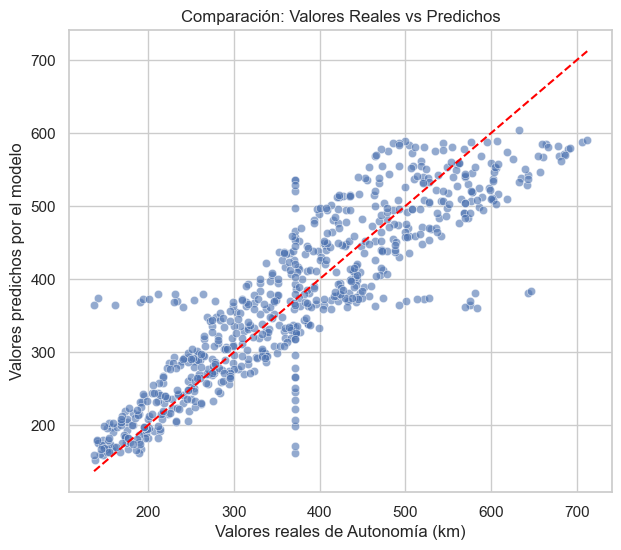

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valores reales de Autonomía (km)")
plt.ylabel("Valores predichos por el modelo")
plt.title("Comparación: Valores Reales vs Predichos")
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--')  # línea de referencia
plt.show()

# **2do Modelo de Machine Learning**
### ***Para C02 Ahorrado (Regresión Lineal)***

### **3. Implementación y Entrenamiento**
Definimos la variable objetivo (CO2_Ahorrado_tons)
y seleccionamos variables numéricas y categóricas relevantes.

In [79]:
import pandas as pd
#Variable objetivo = "CO2_Ahorrado_tons"
y2=df["CO2_Ahorrado_tons"]
#variables numéricas predictoras
var_num2=['Kilometraje_km', 'Consumo_de_Energía_por_100km_recorridos',
    'Autonomía_km', 'Capacidad_de_Batería_kWh', 'Salud_de_Batería_%',
    'Potencia_de_Carga_kW', 'Tiempo_de_Carga_hr', 'Temperatura_°C', 'Año']
#Variables categóricas predictoras (las vamos a convertir en dummies)
var_cat2=['Tipo_de_Uso', 'Tipo_de_Vehículo', 'Región']
#Dataframe con las variables seleccionadas
df_modelo2=df[var_num2+var_cat2]
#One-hot encoding para las variables categóricas
df_modelo2_dummies=pd.get_dummies(df_modelo2, columns=var_cat2, drop_first=True)
#Estas serán nuestras x
X2=df_modelo2_dummies

#### **División de datos (train_test_split)**

In [80]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test=train_test_split(X2, y2, test_size=0.2, random_state=42)

#### **Entrenamiento del modelo**

In [81]:
from sklearn.linear_model import LinearRegression

modelo_co2=LinearRegression()
modelo_co2.fit(x2_train, y2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Para verlos

In [82]:
coeficientes2 = pd.Series(modelo_co2.coef_, index=x2_train.columns)
print(coeficientes2.sort_values(ascending=False))

Región_Desconocido                         0.272935
Tipo_de_Uso_Flota                          0.158091
Región_Europa                              0.076366
Región_Australia                           0.072891
Región_Norteamérica                        0.058086
Tipo_de_Uso_Personal                       0.052021
Año                                        0.027424
Consumo_de_Energía_por_100km_recorridos    0.013669
Salud_de_Batería_%                         0.002323
Autonomía_km                               0.000775
Temperatura_°C                             0.000420
Kilometraje_km                             0.000116
Potencia_de_Carga_kW                      -0.000020
Tipo_de_Uso_Desconocido                   -0.003505
Capacidad_de_Batería_kWh                  -0.005007
Tiempo_de_Carga_hr                        -0.049425
Tipo_de_Vehículo_SUV                      -0.215581
Tipo_de_Vehículo_Sedán                    -0.281116
Tipo_de_Vehículo_Hatchback                -0.298002
Tipo_de_Vehí

#### **Predicción sobre el conjunto de prueba**

In [83]:
y2_pred=modelo_co2.predict(x2_test)
y2_pred

array([24.84297058,  8.95839315,  3.98293658, 28.38398292, 18.84808128,
        7.53692855, 23.55305951, 26.31121843, 12.79414681, 24.52053112,
       13.47550079,  5.86677241, 20.33169199,  3.35381783, 24.89549149,
       10.88276749, 21.76462684, 17.80124981, 22.12213484, 15.94460166,
        2.12842564, 16.38819616, 15.48020359,  9.7125175 , 19.97121445,
       29.40467809, 11.37695739,  2.16918113, 14.06326153, 12.66705944,
        9.22742032,  5.72207074,  7.02273658,  2.8102756 ,  2.77738947,
        2.18809691, 14.91573596,  8.31286726,  3.04090615, 27.30225736,
       17.22839415,  4.86534317, 16.61806331,  4.68012585, 19.08545541,
        3.12017235,  3.06179744, 19.66706344,  9.32769643, 26.57709594,
       15.65382236, 16.122303  , 19.84880938, 10.34866369, 19.68566909,
       11.63022913,  4.948554  ,  5.99847761, 29.46322127, 20.43892777,
        8.84017931, 12.58153238, 20.3296    ,  2.18555984, 20.02956383,
       16.69206381,  4.50365034,  8.00193155,  5.50701062,  7.75

### **4. Resultados y Evaluación del modelo 2**

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2_test, y2_pred)

print("MAE 2:", mae2)
print("MSE 2:", mse2)
print("RMSE 2:", rmse2)
print("R² 2:", r2_2)

MAE 2: 0.8751733731033934
MSE 2: 5.895431737409801
RMSE 2: 2.428051016228819
R² 2: 0.9124981578261453


### **5. Visualización de Resultados**

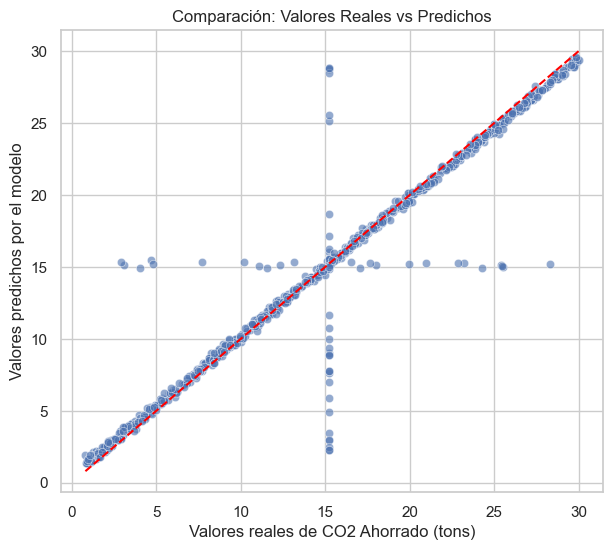

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.scatterplot(x=y2_test, y=y2_pred, alpha=0.6)
plt.xlabel("Valores reales de CO2 Ahorrado (tons)")
plt.ylabel("Valores predichos por el modelo")
plt.title("Comparación: Valores Reales vs Predichos")
plt.plot([y2_test.min(), y2_test.max()], 
         [y2_test.min(), y2_test.max()], 
         color='red', linestyle='--')  # línea de referencia
plt.show()

In [ ]:
# y_pred=modelo_autonomia.predict(x_test)
y_pred #Varable con las predicciones del modelo de autonomía
# y2_pred=modelo_co2.predict(x2_test)
y2_pred #Variable con las predicciones del modelo de CO2


In [88]:
# VARIABLES PARA MODELO 1 (Autonomía)
features_numericas = ['Capacidad_de_Batería_kWh', 'Consumo_de_Energía_por_100km_recorridos',
    'Salud_de_Batería_%', 'Potencia_de_Carga_kW', 'Tiempo_de_Carga_hr', 'Temperatura_°C',
    'Kilometraje_km', 'Año']

features_categoricas = ['Tipo_de_Vehículo', 'Región', 'Tipo_de_Uso']

df_model = df[features_numericas + features_categoricas]
df_model_dummies = pd.get_dummies(df_model, columns=features_categoricas, drop_first=True)

X11 = df_model_dummies
y11 = df['Autonomía_km']

#VARIABLES PARA EL MODELO 2 (CO2 Ahorrado)
features_numericas_2 = ['Kilometraje_km', 'Consumo_de_Energía_por_100km_recorridos',
                        'Autonomía_km', 'Capacidad_de_Batería_kWh', 'Salud_de_Batería_%',
                        'Potencia_de_Carga_kW', 'Tiempo_de_Carga_hr', 'Temperatura_°C', 'Año']
features_categoricas_2 = ['Tipo_de_Uso', 'Tipo_de_Vehículo', 'Región']
df_model_2 = df[features_numericas_2 + features_categoricas_2]
df_model_2_dummies = pd.get_dummies(df_model_2, columns=features_categoricas_2, drop_first=True)

X22 = df_model_2_dummies
y22 = df['CO2_Ahorrado_tons']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

modelo_autonomia = LinearRegression()
modelo_autonomia.fit(X_train, y_train)

# Predicciones SOLO del test (para métricas, ya lo hiciste antes)
y_pred = modelo_autonomia.predict(X_test)

# Predicciones para TODAS las filas (esto es lo que queremos para Power BI)
df["Predi_Autonomia"] = modelo_autonomia.predict(X)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42)

modelo_co2 = LinearRegression()
modelo_co2.fit(X2_train, y2_train)

#Predicciones del test (para métricas, ya lo hiciste)
y2_pred = modelo_co2.predict(X2_test)

#Predicciones para TODAS las filas
df["Predi_CO2"] = modelo_co2.predict(X2)

df["Error_Autonomia"] = df["Autonomía_km"] - df["Predi_Autonomia"]
df["Error_CO2"]       = df["CO2_Ahorrado_tons"] - df["Predi_CO2"]

df.to_csv("vehiculos_electricos_con_predicciones.csv", index=False)